# Linear Regression Project

## NASA Airfoil Pressure Level

Author: Piotr Druzdzel <br>
E-mail: piotr.druzdzel@gmail.com <br>

Data source: UCI Machine Learning Repository <br>
https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

Data Set Information: <br>
The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. <br>
The span of the airfoil and the observer position were the same in all of the experiments.

Independent variables: <br>
1. Frequency, in Hertzs. <br>
2. Angle of attack, in degrees. <br>
3. Chord length, in meters. <br>
4. Free-stream velocity, in meters per second. <br>
5. Suction side displacement thickness, in meters. <br>

Dependent variable: <br>
6. Scaled sound pressure level, in decibels.

Basic libraries:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk

Quick fix for the dark theme plotting to have readable labels:

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

Importing dataset:

In [3]:
df_original = pd.read_csv("airfoil_self_noise.dat", 
                          sep='\t', 
                          names=["Frequency", "AoA", "Chord", "V_inf", "displacement_t", "SPL"], 
                          engine='python')

Making a copy:

In [4]:
df = df_original.copy()

### Data exploration:

Checking the structure:

In [5]:
df

,Frequency,AoA,Chord,V_inf,displacement_t,SPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


Basic check for the type of data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Frequency       1503 non-null   int64  
 1   AoA             1503 non-null   float64
 2   Chord           1503 non-null   float64
 3   V_inf           1503 non-null   float64
 4   displacement_t  1503 non-null   float64
 5   SPL             1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [7]:
df.describe()

,Frequency,AoA,Chord,V_inf,displacement_t,SPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


Routine check for missing values:

In [8]:
df.isnull().sum()

Frequency         0
AoA               0
Chord             0
V_inf             0
displacement_t    0
SPL               0
dtype: int64

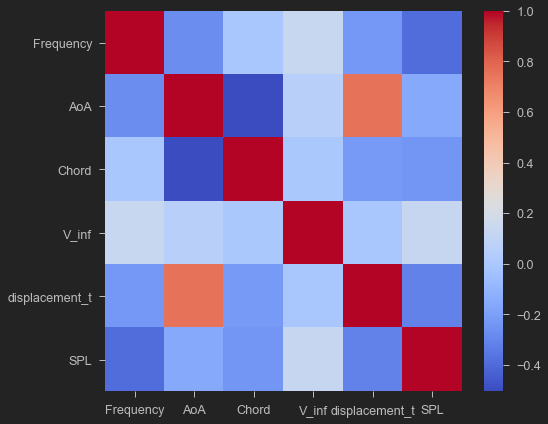

In [9]:
sns.heatmap(df.corr(), cmap='coolwarm')

Checking for correlations:

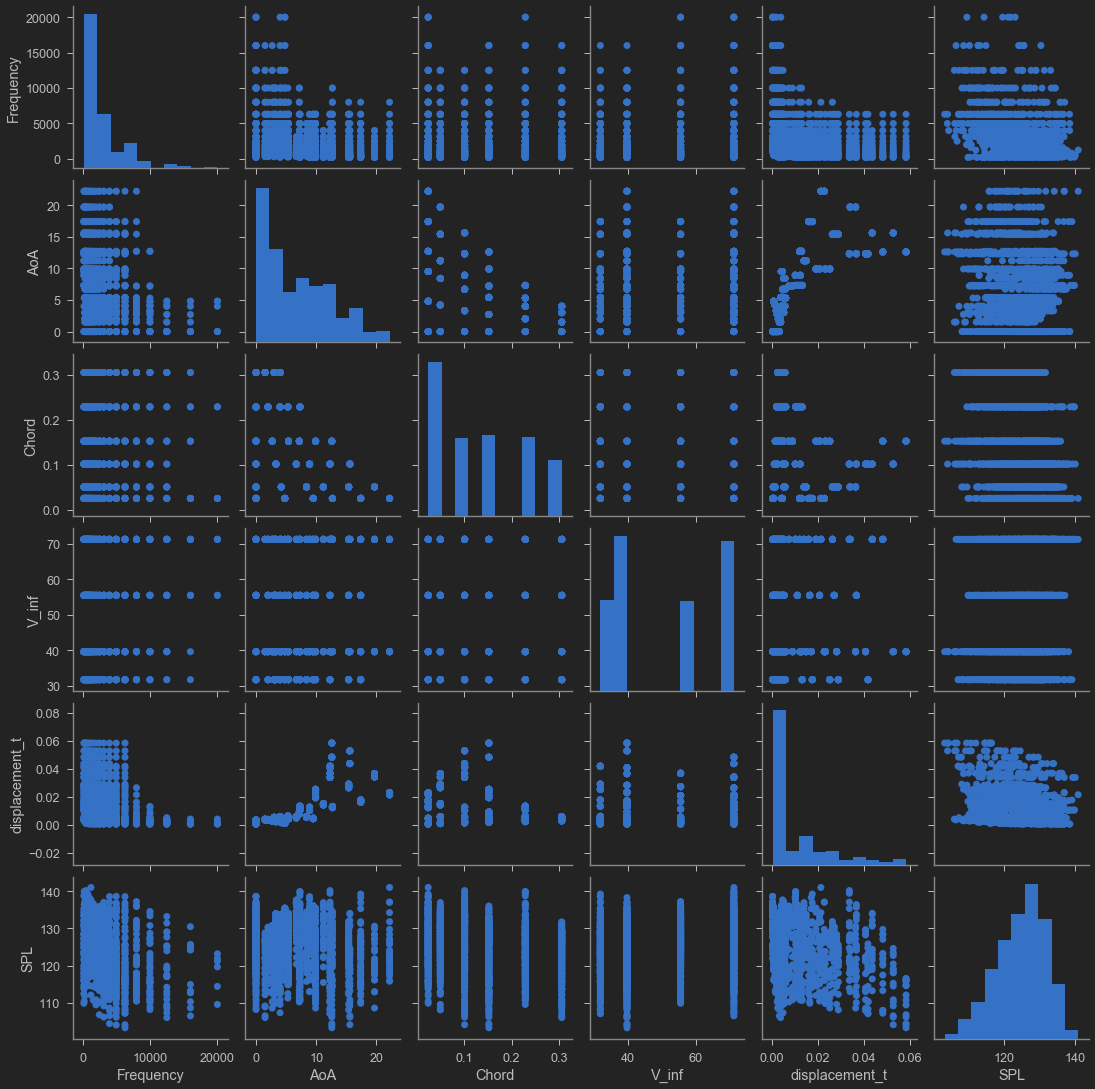

In [10]:
sns.pairplot(df, plot_kws=dict(edgecolor="none"))

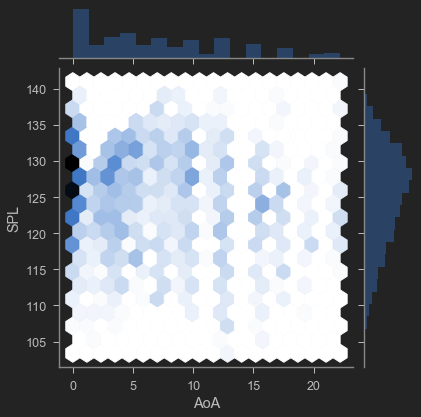

In [11]:
sns.jointplot(x='AoA',y='SPL',data=df, kind='hex');

### Train-Test set split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = df['SPL']
X = df.drop(['SPL'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the data
Not a must in linear regression due to coefficients accounting for scale of numbers but helps in interpretation.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Simple Linear Regression

### Training the model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linear_model = LinearRegression()

In [18]:
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predictions:

In [19]:
for coefficient in linear_model.coef_:
    print(coefficient)

-4.059447042606654
-2.3667367900365717
-3.2199521491835017
1.5269010028407006
-1.8155901496175622


Predicted Sound Pressure Levels (SPL):

In [20]:
predictions_lin = linear_model.predict(X_test)

Checking how did simple linear model perform (actually, not too good):

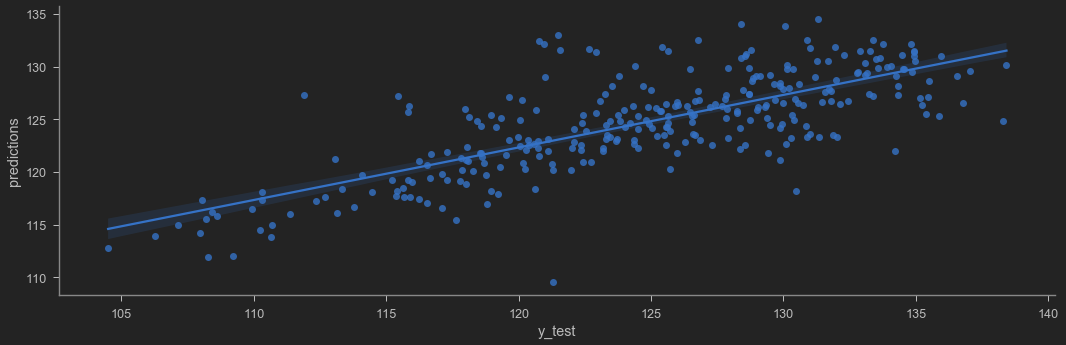

In [21]:
pred_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions_lin})
sns.lmplot(x='y_test', 
           y='predictions', 
           data=pred_df,
           height=5,
           aspect=3)

### Residuals (y_test - y_pred):

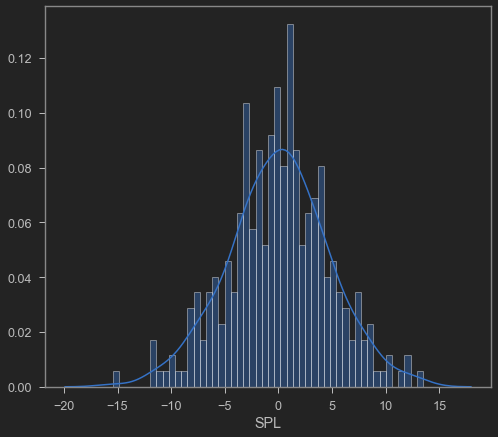

In [22]:
sns.distplot((y_test-predictions_lin),
             bins=50,
             hist_kws=dict(edgecolor="w", linewidth=1));

Standard deviation of the residuals:

In [23]:
(y_test-predictions_lin).std()

4.711939262503512

### Coefficients table:

In [24]:
coeffecients = pd.DataFrame(data=linear_model.coef_,
                            index=X.columns,
                            columns=['Coeffecient'])
coeffecients

,Coeffecient
Frequency,-4.059447
AoA,-2.366737
Chord,-3.219952
V_inf,1.526901
displacement_t,-1.815590


Frequency, Angle of attack and Chord length have the biggest impact on self-induced noise of NACA 0012 airfoil.

### R2 score:

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test, predictions_lin)

0.5582979754897284

## Choosing the right polynomial degree:
Choosing RootMean Square as an indicator. It penalizes the outliers but less than MSE.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

RMSE_score = [] #RMSE between the predicted values and the test
training_fit = [] #RMSE between the predicted values and the training set on which the data was trained (expected overfit)

degrees = range(1,7)

for deg in degrees:
    
    poly_reg = PolynomialFeatures(degree=deg)
    
    X_poly_train = poly_reg.fit_transform(X_train)
    X_poly_test  = poly_reg.fit_transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)
    
    predictions_poly = poly_model.predict(X_poly_test)
    RMSE_poly = np.sqrt(metrics.mean_squared_error(y_test, predictions_poly)) 
    
    predictions_train = poly_model.predict(X_poly_train)                        # not paramount, just to check
    fit_poly =  np.sqrt(metrics.mean_squared_error(y_train, predictions_train)) # not paramount, just to check
     
    RMSE_score.append(RMSE_poly)
    training_fit.append(fit_poly) # not paramount, just to see

### Elbow curve:

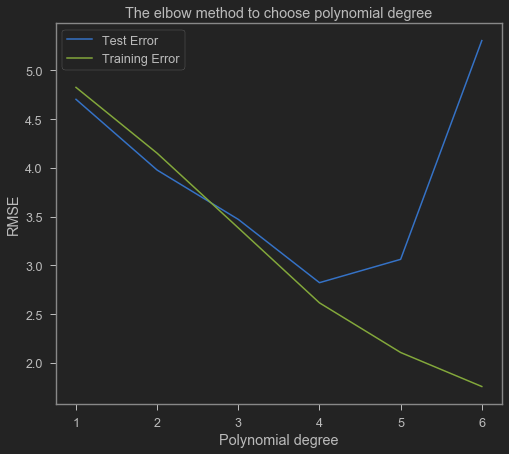

In [28]:
plt.plot(degrees, RMSE_score, label='Test Error')
plt.plot(degrees, training_fit, label='Training Error')
plt.title('The elbow method to choose polynomial degree')
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Above 4th degree we begin to overfit!

## Polynomial Linear Regression:

In [29]:
poly_reg = PolynomialFeatures(degree=4)

X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test  = poly_reg.fit_transform(X_test)

In [30]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
predictions_poly = poly_model.predict(X_poly_test)

### LM plot

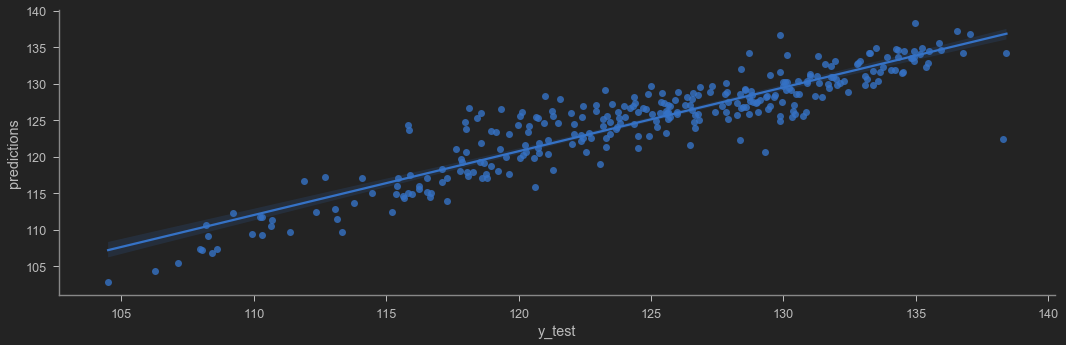

In [32]:
pred_poly_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions_poly})

sns.lmplot(x='y_test', 
           y='predictions', 
           data=pred_poly_df, 
           height=5, 
           aspect=3);

### Residuals (y_test - y_pred):

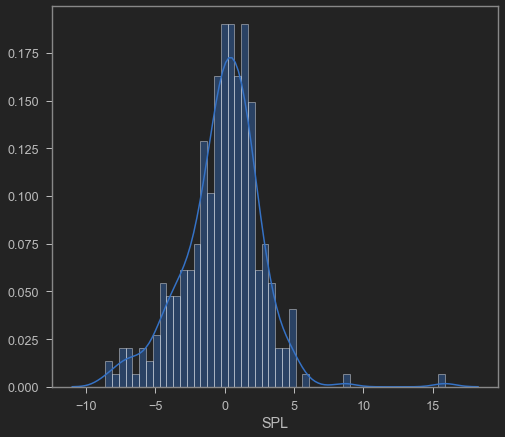

In [33]:
sns.distplot((y_test-predictions_poly),
             bins=50,
             hist_kws=dict(edgecolor="w", linewidth=1));

Smaller standard deviation for the polynomial regression.

In [34]:
(y_test-predictions_poly).std()

2.822661667199543

### Coefficients table:

In [35]:
poly_model.coef_

array([ 3.34600886e-10, -1.16139662e+01, -1.17337302e+02, -1.51778287e+01,
        9.84348626e+00,  9.35389535e+01,  2.02991946e+00, -5.47907116e+00,
        2.72876110e+00,  3.06638178e-01, -7.07221644e-01,  4.93909480e+01,
       -9.13410229e+01, -9.91634957e+00, -2.27161383e+02, -1.73257688e+01,
        2.81498964e+00,  4.70212507e+01, -3.87344258e+00,  1.45650240e+01,
        8.26557355e+01,  1.96178172e+00, -1.77566161e+00,  5.41541747e+00,
       -5.20312361e-01,  1.07379183e+01, -1.25271557e+01, -2.17230592e+01,
        9.21851989e-01,  1.75604429e+01, -1.62837702e+00,  2.73199140e-01,
        1.96777419e+01, -2.34702878e-01, -1.12005727e+00, -2.41960845e+00,
        9.18406416e+00,  1.33453947e+02, -7.81096624e+00,  4.12482929e+01,
        6.71089603e+01, -1.57483037e+01, -3.20880651e+02,  5.48146520e+00,
        4.68022704e+00, -6.42588589e+01,  1.55913202e+01, -2.78936532e+00,
       -5.53319294e+01,  2.38897167e+00,  1.64232611e+01,  1.26134302e+02,
        3.47221819e-01, -

### R2 score:

In [36]:
r2_score(y_test, predictions_poly)

0.8408682035801864

### Other plots

In [37]:
results = pd.DataFrame({'Test': y_test, 'Predictions': predictions_poly})
results.sort_index(inplace=True)
results

,Test,Predictions
15,127.696,126.894406
23,121.106,122.365913
29,118.129,126.633326
30,119.319,126.599637
32,124.809,126.485057
...,...,...
1471,107.147,105.477083
1473,130.898,130.333826
1481,123.178,125.128919
1493,118.964,118.755317


Checking the trend every 3rd (!) index (otherwise quite dense):

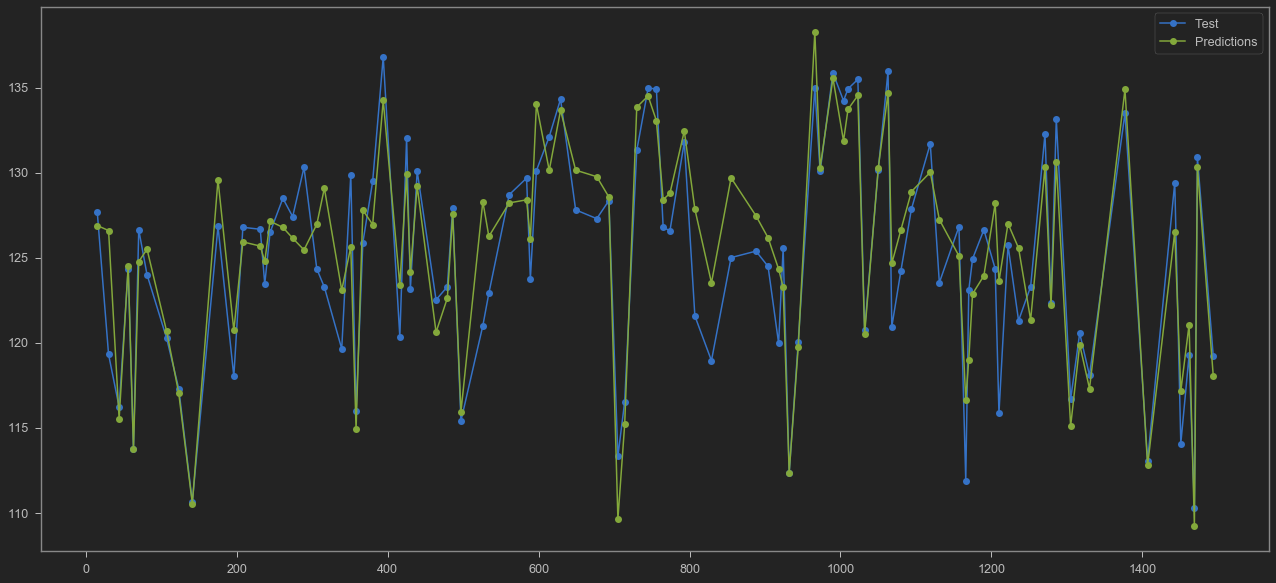

In [38]:
plt.figure(figsize=(22,10))
plt.plot(results.index[::3], results['Test'][::3], '-o', label='Test')
plt.plot(results.index[::3], results['Predictions'][::3], '-o', label='Predictions')
plt.legend()
plt.show()

Jointplot:

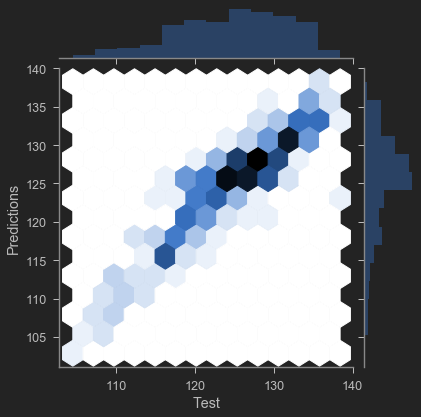

In [39]:
sns.jointplot(x='Test', y='Predictions', data=results, kind='hex');

# Model comparison 
(Linear Regression, SVR, Decision Tree, Random Forest, XGB)

In [40]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection

accuriacies = []
names = []
    
models = [('LR', LinearRegression()),
          ('SVR', SVR(kernel='rbf', gamma='auto')),
          ('DT', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor(n_estimators=10)),
          ('XGB', XGBRegressor())]
    
for name, model in models:
    
    model.fit(X_train, y_train)
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    accuracy_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    
    accuriacies.append(accuracy_results)
    names.append(name)

### Boxplot 

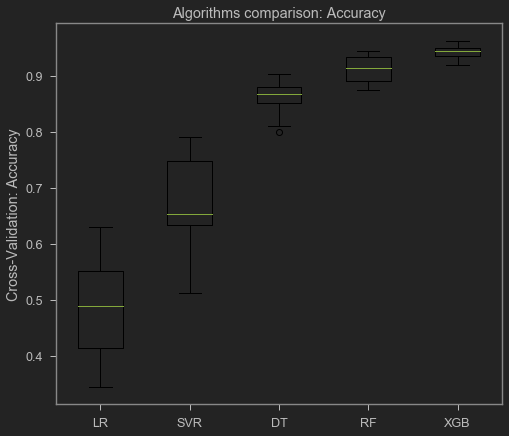

In [41]:
fig, ax = plt.subplots()
ax.set_title('Algorithms comparison: Accuracy')
ax.set_xticklabels(names)
ax.set_ylabel('Cross-Validation: Accuracy')
ax.boxplot(accuriacies)
plt.show()

In [42]:
mean_accuracies = [result.mean() for result in accuriacies]
mean_accuracies

[0.48497288047299403,
 0.6713685943393249,
 0.8599391215971044,
 0.9128427097960982,
 0.9418386058774585]

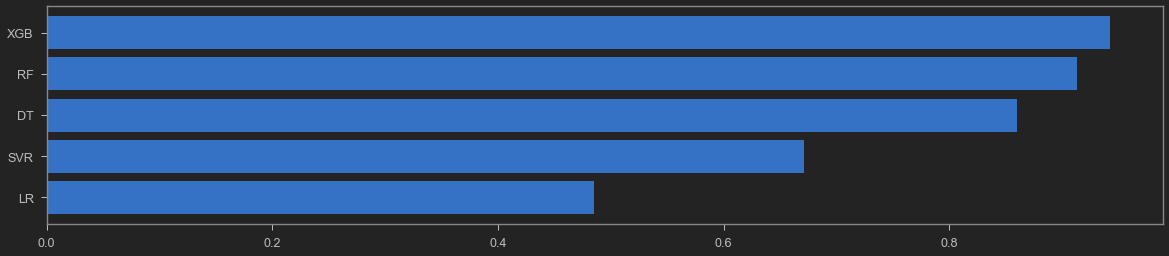

In [43]:
shortcuts_df = pd.DataFrame({'Models': names, 'Accuracies': mean_accuracies})

plt.figure(figsize=(20,4))
plt.barh(shortcuts_df['Models'], mean_accuracies);

# Deciding to use XGB Boost:

Using XGB with default setup:

In [44]:
model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
predictions_XGB = model_XGB.predict(X_test)

### R2 score:

In [46]:
r2_score(y_test, predictions_XGB)

0.9517809180941498

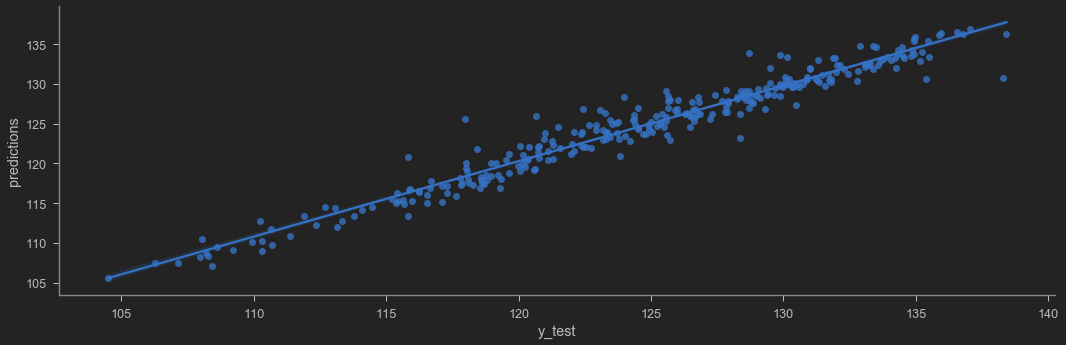

In [47]:
pred_XGB_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions_XGB})

sns.lmplot(x='y_test', 
           y='predictions', 
           data=pred_XGB_df,
           height=5, 
           aspect=3);

A very good fit compared to other models!

### Residuals (y_test - y_pred):

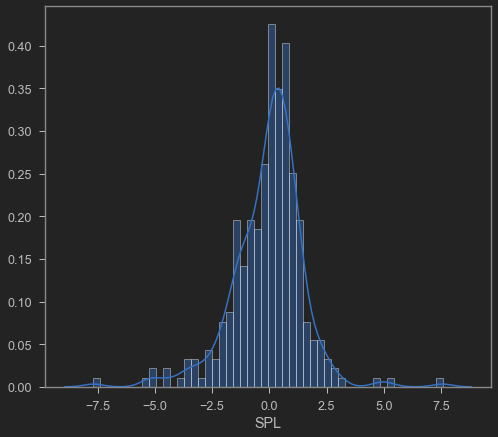

In [48]:
sns.distplot((y_test-predictions_XGB),
             bins=50,
             hist_kws=dict(edgecolor="w", linewidth=1));

In [49]:
results_XGB = pd.DataFrame({'Test': y_test, 'Predictions': predictions_XGB})
results_XGB.sort_index(inplace=True)
results_XGB

,Test,Predictions
15,127.696,127.878067
23,121.106,121.507217
29,118.129,117.490829
30,119.319,117.991508
32,124.809,123.757660
...,...,...
1471,107.147,107.530579
1473,130.898,130.570587
1481,123.178,124.204453
1493,118.964,118.407310


SPL plot for every 3rd measurement for clarity:

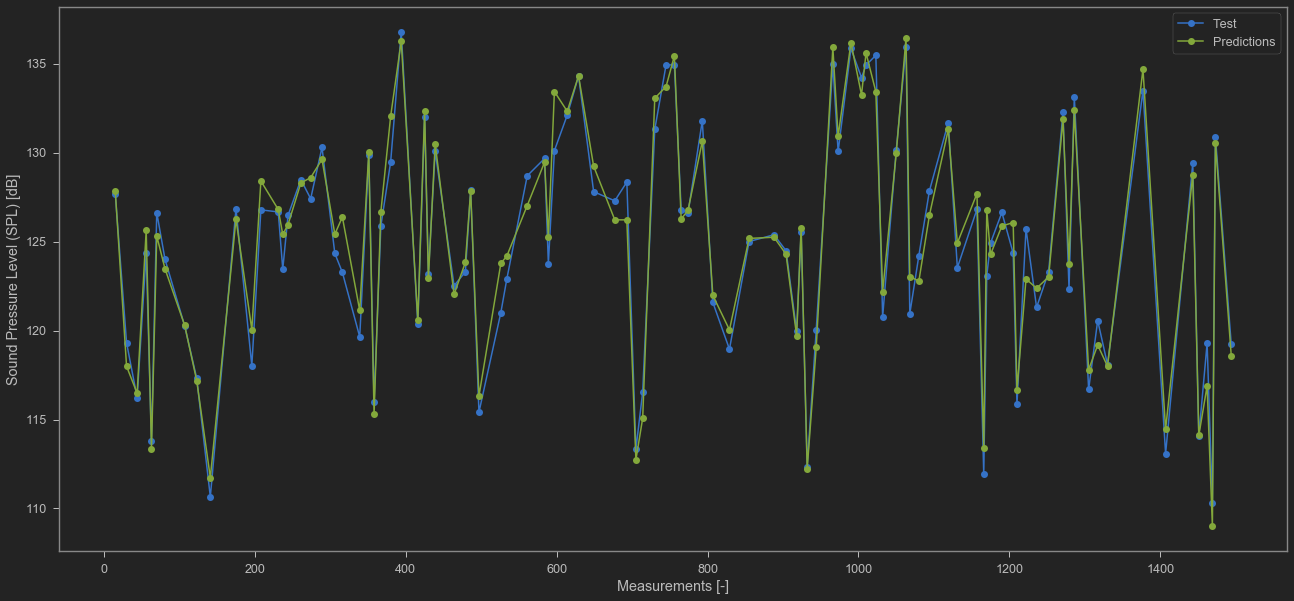

In [50]:
plt.figure(figsize=(22,10))
plt.plot(results_XGB.index[::3], results_XGB['Test'][::3], '-o', label='Test')
plt.plot(results_XGB.index[::3], results_XGB['Predictions'][::3], '-o', label='Predictions')
plt.xlabel('Measurements [-]')
plt.ylabel('Sound Pressure Level (SPL) [dB]')
plt.legend()
plt.show()